## Логистическая регрессия

In [ ]:
%pylab inline
%matplotlib inline
import numpy as np
import pandas as pd
import seaborn as sns
from tqdm import tqdm # pip install tqdm – замер времени выполнения итераций цикла
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier

import warnings
warnings.filterwarnings('ignore')

Populating the interactive namespace from numpy and matplotlib


## Часть 1. Визуальный анализ данных

**Считаем [данные](https://archive.ics.uci.edu/ml/datasets/Adult) по жителям США из репозитория UCI. По ссылке можно почитать про данные и смысл признаков.**

In [ ]:
adult = pd.read_csv('adult.data.csv')

In [ ]:
adult.head()

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,salary
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K


**Поисследуйте данные – постройте графики с помощью seaborn, посмотрите, как целевой признак salary зависит от других (Можно использовать методы distplot, pairplot, countplot, boxplot из seaborn. Эта часть задания строго не формулируется)**

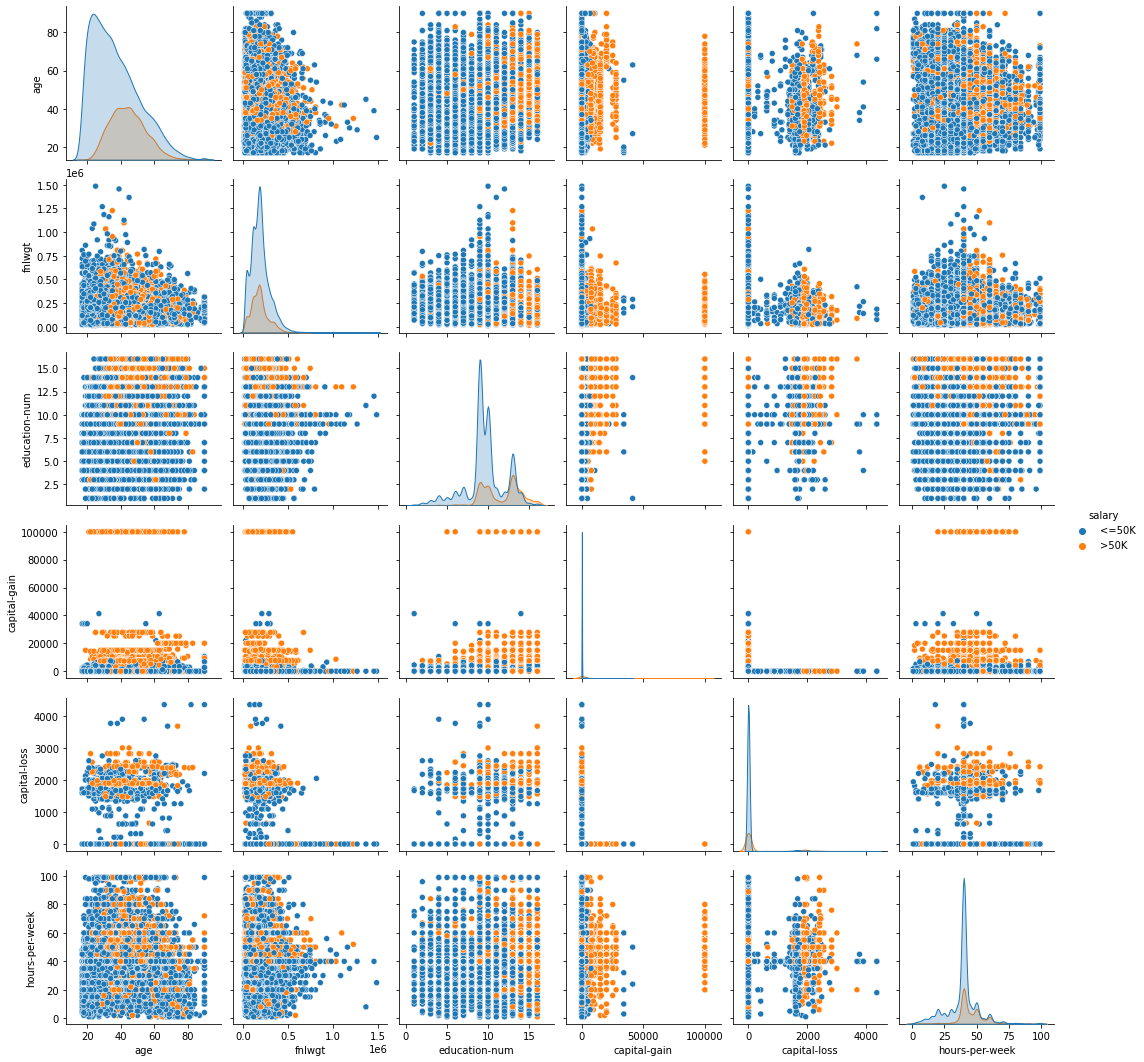

In [ ]:
sns.pairplot(adult, hue="salary", diag_kind="kde")

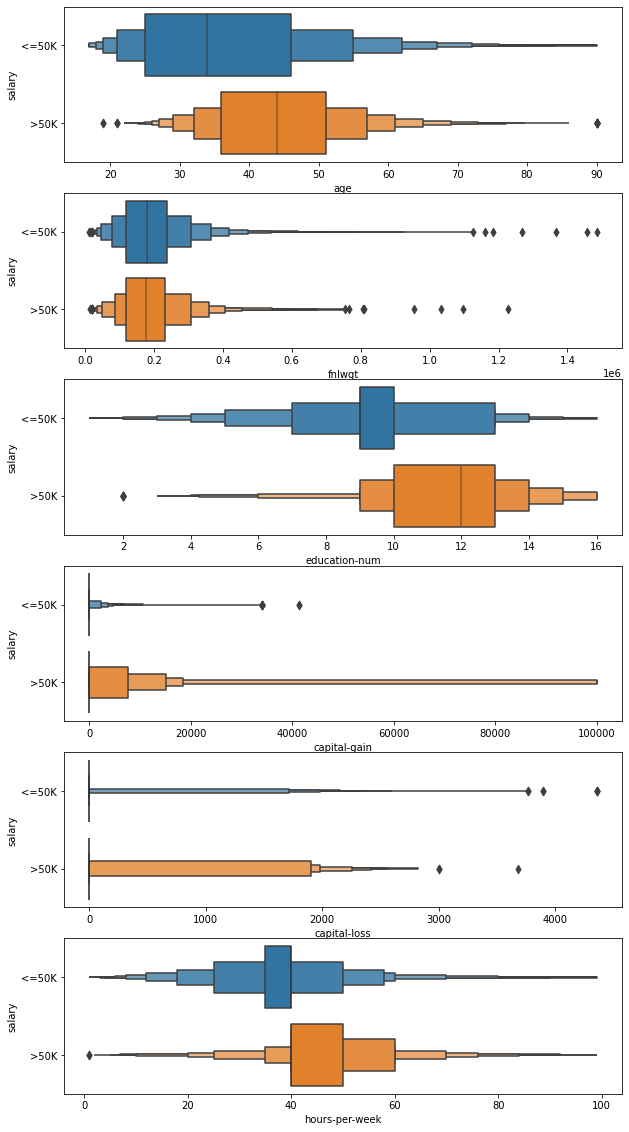

In [ ]:
num_data = ['age', 'fnlwgt', 'education-num', 'capital-gain', 'capital-loss', 'hours-per-week']
fig, axes = plt.subplots(len(num_data), 1, figsize=(10, 20))
for i in range(len(num_data)):
    sns.boxenplot(x=num_data[i],y='salary', data=adult[num_data+['salary']], ax=axes[i])

## Часть 2. Подготовка данных

**Выделим целевой признак *y*, равный 1, если зарплата > 50K ($50 тыс. в год) и 0 – иначе.**

In [ ]:
def salary_category(salary):
    if salary == '>50K':
        return 1 
    else:
        return 0

In [ ]:
y = adult['salary'].apply(salary_category)

**Составьте DataFrame *X* из количественных признаков – *age, fnlwgt, education-num, capital-gain, capital-loss, hours-per-week*.**

In [ ]:
num = ["age", "fnlwgt", "education-num", "capital-gain", "capital-loss", "hours-per-week"]
X = adult[num]


In [ ]:
X.head()

,age,fnlwgt,education-num,capital-gain,capital-loss,hours-per-week
0,39,77516,13,2174,0,40
1,50,83311,13,0,0,13
2,38,215646,9,0,0,40
3,53,234721,7,0,0,40
4,28,338409,13,0,0,40


**Разбейте *X* и *y* на обучающую и проверочную части в отношении 7:3 с помощью метода *train_test_split* из *sklearn.model_selection*. Поскольку разбиение случайно, зафиксируйте параметр *random_state=17* – для воспроизводимости результатов.**

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=17) 


## Часть 3. Обучение моделей с параметрами по умолчанию

**Обучите логистическую регрессию с настройками по умолчанию (единственное, укажите *random_state=17*) на тренировочной части выборки *(X_train, y_train)*, сделайте прогнозы для проверочной части *(X_test, y_test)*, посчитайте долю правильных ответов (*accuracy_score* из *sklearn.metrics* или метод *score* у обученной модели) на обеих выборках X_train, X_test.**

In [ ]:
from sklearn.metrics import accuracy_score

In [ ]:
lr = LogisticRegression(random_state=17)
lr.fit(X_train, y_train)
y_train_pred = lr.predict(X_train)
y_test_pred = lr.predict(X_test)
print(accuracy_score(y_true=y_train, y_pred=y_train_pred))
print(accuracy_score(y_true=y_test, y_pred=y_test_pred))

0.7990961740961741
0.7927116388576108


**Линейные методы классификации и регрессии чувствительны к диапазону изменения значений признаков и работают лучше, если отмасштабировать признаки – для каждого признака вычесть среднее значение признака и поделить на стандартное отклонение. Это делает например класс *StandartScaler* из *sklearn.preprocessing*.**

In [ ]:
scaler = StandardScaler()
scaler.fit(X_train)

X_train_scaled = scaler.transform(X_train)
X_test_scaled = scaler.transform(X_test)

**Теперь обучитесь и посчитайте accuracy для выборок X_train_scaled, X_test_scaled.**

In [ ]:
lr.fit(X_train_scaled, y_train)
y_train_scaled_pred = lr.predict(X_train_scaled)
y_test_scaled_pred = lr.predict(X_test_scaled)
print(accuracy_score(y_true=y_train, y_pred=y_train_scaled_pred))
print(accuracy_score(y_true=y_test, y_pred=y_test_scaled_pred))

0.8155931905931906
0.8161531374756884


**<font color='red'>Вопрос 1.</font> Какова доля правильных ответов логистической регрессии на выборке *(X_test_scaled, y_test)*?** 

**Добавьте в данные X категориальные признаки education, occupation, relationship, race, sex. Преобразуйте их в числовые с помощью OneHotEncoder https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.OneHotEncoder.html. Примените StandartScaler для вещественных признаков. Оберните все в пайплайн.**

In [ ]:
from sklearn.pipeline import make_union, make_pipeline
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.preprocessing import FunctionTransformer

def get_categ_col(df):
    return df[['education-num', 'occupation', 'relationship', 'race', 'sex']]

def get_num_cols(df):
    return df[['age', 'fnlwgt', 'education-num', 'capital-gain', 'capital-loss', 'hours-per-week']]

vec = make_union(*[
     make_pipeline(FunctionTransformer(get_categ_col, validate=False),  OneHotEncoder(sparse=False)),
     make_pipeline(FunctionTransformer(get_num_cols, validate=False), StandardScaler())
])

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(adult, y, test_size=0.3, random_state=17) 

In [ ]:
X_train_scaled_categ = vec.fit_transform(X_train)
X_test_scaled_categ = vec.transform(X_test)

**Повторите процедуру train_test_split с random_state=17 для преобразованного датасета X_scaled_categ.
Обучите логистическую регрессию еще раз**

In [ ]:
lr.fit(X_train_scaled_categ, y_train)
y_train_categ_pred = lr.predict(X_train_scaled_categ)
y_test_categ_pred = lr.predict(X_test_scaled_categ)
print(accuracy_score(y_true=y_test, y_pred=y_test_categ_pred))

print(roc_auc_score(y_test,y_test_categ_pred))

0.8487050875217524
0.7626975597384711


**<font color='red'>Вопрос 2.</font> Какова доля правильных ответов логистической регрессии на выборке *(X_test_scaled_categ, y_test)*?**

## Часть 4. Балансировка классов. 

Алгоритмы классификации могут быть очень чувствительны к несбалансированным классам. Рассмотрим пример с выборками, сэмплированными из двух гауссиан. Их мат. ожидания и матрицы ковариации заданы так, что истинная разделяющая поверхность должна проходить параллельно оси x. Поместим в обучающую выборку 20 объектов, сэмплированных из 1-й гауссианы, и 10 объектов из 2-й. После этого обучим на них линейную регрессию, и построим на графиках объекты и области классификации.

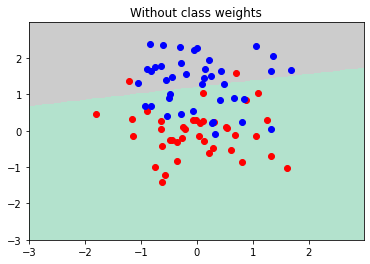

AUC: 0.911667


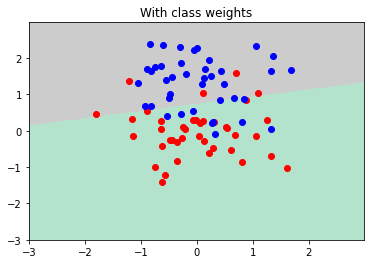

AUC: 0.906667


In [ ]:
import numpy as np
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import roc_auc_score
%matplotlib inline
import matplotlib.pyplot as plt

param_grid = {'C': [0.01, 0.05, 0.1, 0.5, 1, 5, 10]}
cv = 3

np.random.seed(0)
"""Сэмплируем данные из первой гауссианы"""
data_0 = np.random.multivariate_normal([0,0], [[0.5,0],[0,0.5]], size=40)
"""И из второй"""
data_1 = np.random.multivariate_normal([0,1], [[0.5,0],[0,0.5]], size=40)
"""На обучение берём 20 объектов из первого класса и 10 из второго"""
example_data_train = np.vstack([data_0[:20,:], data_1[:10,:]])
example_labels_train = np.concatenate([np.zeros((20)), np.ones((10))])
"""На тест - 20 из первого и 30 из второго"""
example_data_test = np.vstack([data_0[20:,:], data_1[10:,:]])
example_labels_test = np.concatenate([np.zeros((20)), np.ones((30))])
"""Задаём координатную сетку, на которой будем вычислять область классификации"""
xx, yy = np.meshgrid(np.arange(-3, 3, 0.02), np.arange(-3, 3, 0.02))
"""Обучаем регрессию без балансировки по классам"""
optimizer = GridSearchCV(LogisticRegression(), param_grid, cv=cv, n_jobs=-1)
optimizer.fit(example_data_train, example_labels_train)
"""Строим предсказания регрессии для сетки"""
Z = optimizer.predict(np.c_[xx.ravel(), yy.ravel()]).reshape(xx.shape)
plt.pcolormesh(xx, yy, Z, cmap=plt.cm.Pastel2)
plt.scatter(data_0[:,0], data_0[:,1], color='red')
plt.scatter(data_1[:,0], data_1[:,1], color='blue')
"""Считаем AUC"""
auc_wo_class_weights = roc_auc_score(example_labels_test, optimizer.predict_proba(example_data_test)[:,1])
plt.title('Without class weights')
plt.show()
print('AUC: %f'%auc_wo_class_weights)
"""Для второй регрессии в LogisticRegression передаём параметр class_weight='balanced'"""
optimizer = GridSearchCV(LogisticRegression(class_weight='balanced'), param_grid, cv=cv, n_jobs=-1)
optimizer.fit(example_data_train, example_labels_train)
Z = optimizer.predict(np.c_[xx.ravel(), yy.ravel()]).reshape(xx.shape)
plt.pcolormesh(xx, yy, Z, cmap=plt.cm.Pastel2)
plt.scatter(data_0[:,0], data_0[:,1], color='red')
plt.scatter(data_1[:,0], data_1[:,1], color='blue')
auc_w_class_weights = roc_auc_score(example_labels_test, optimizer.predict_proba(example_data_test)[:,1])
plt.title('With class weights')
plt.show()
print('AUC: %f'%auc_w_class_weights)

Как видно, во втором случае классификатор находит разделяющую поверхность, которая ближе к истинной, т.е. меньше переобучается. Поэтому на сбалансированность классов в обучающей выборке всегда следует обращать внимание.

**Далее мы сравним два способа балансировки, и выберем наилучший**

**№1** Обучите логистическую регрессию используя веса (параметр class_weight='balanced' регрессии) на выборке X_train_scaled_categ. Посчитайте метрику ROC AUC на тестовой выборке X_test_scaled_categ.

In [ ]:
from sklearn.metrics import roc_auc_score
lr = LogisticRegression(random_state=17,class_weight='balanced')
lr.fit(X_train_scaled_categ, y_train)
y_test_categ_pred= lr.predict(X_test_scaled_categ)

In [ ]:
#accuracy
print(accuracy_score(y_test, y_test_categ_pred))

0.8132869280376702


In [ ]:
#roc_auc - несмотря на то что accuracy уменьшилась, вторая метрика увеличилась плосле балансировки
print(roc_auc_score(y_test, y_test_categ_pred))

0.8237369937824907


**№2** Теперь сбалансируйте обучающую выборку, досэмплировав в неё объекты из меньшего класса. Для получения индексов объектов, которые требуется добавить в обучающую выборку, используйте следующую комбинацию вызовов функций:
        
        np.random.seed(0)
        indices_to_add = np.random.randint(...)
        X_train_to_add = X_train_scaled_categ[y_train.as_matrix() == 1,:][indices_to_add,:]
  
   После этого добавьте объекты X_train_to_add к обучающей выборке и дополните соответствующим образом вектор ответов y. Обучите обычную модель на расширенной выборке и замерьте roc_auc_score.

In [ ]:
#Ваш код здесь

## Настройка гиперпараметров

Подберите гиперпараметр С (переберите 50 значений от 0.001 до 1, c_values = np.linspace(1e-3, 1, 50)) с помощью метода LogisticRegressionCV на выборке X_train_scaled_categ. Посмотрите как изменилась метрика ROC AUC на тестовой выборке.

In [ ]:
from sklearn.linear_model import LogisticRegressionCV
from sklearn.model_selection import StratifiedKFold

c_values = np.linspace(1e-3, 1, 50)

skf = StratifiedKFold(n_splits=5, shuffle=True, random_state=5)
lr_cv = LogisticRegressionCV(c_values, random_state=17, cv = skf,  verbose=1, n_jobs=-1, scoring='roc_auc')
lr_cv.fit(X_train_scaled_categ, y_train)

[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done   2 out of   5 | elapsed:    5.5s remaining:    8.2s
[Parallel(n_jobs=-1)]: Done   5 out of   5 | elapsed:    5.5s finished


LogisticRegressionCV(Cs=array([0.001     , 0.02138776, 0.04177551, 0.06216327, 0.08255102,
       0.10293878, 0.12332653, 0.14371429, 0.16410204, 0.1844898 ,
       0.20487755, 0.22526531, 0.24565306, 0.26604082, 0.28642857,
       0.30681633, 0.32720408, 0.34759184, 0.36797959, 0.38836735,
       0.4087551 , 0.42914286, 0.44953061, 0.46991837, 0.49030612,
       0.51069388, 0.53108163, 0.55146939, 0.57185714, 0.5922449 ,
       0.61263265, 0.63302041, 0.65340816, 0.67379592, 0.69418367,
       0.71457143, 0.73495918, 0.75534694, 0.77573469, 0.79612245,
       0.8165102 , 0.83689796, 0.85728571, 0.87767347, 0.89806122,
       0.91844898, 0.93883673, 0.95922449, 0.97961224, 1.        ]),
                     cv=StratifiedKFold(n_splits=5, random_state=5, shuffle=True),
                     n_jobs=-1, random_state=17, scoring='roc_auc', verbose=1)

In [ ]:
#лучший параметр
lr_cv.C_

array([0.16410204])

In [ ]:
#средний roc_auc на тестовых фолдах
s = pd.DataFrame([i for i in lr_cv.scores_.values()][0]).mean()

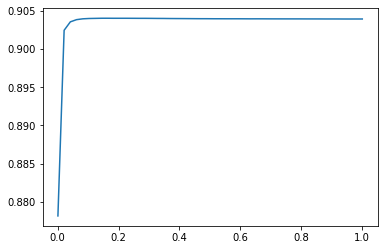

In [ ]:
plt.plot(lr_cv.Cs_, s)

Теперь сравните результаты обучения X_train с предсказаниями на X_test

In [ ]:
logit_train_scores, logit_test_scores = [], []
c_values = np.linspace(1e-3, 1, 50)
for c_val in tqdm(c_values):
    logit = LogisticRegression(C = c_val,  random_state=17, class_weight = 'balanced') 
    logit.fit(X_train_scaled_categ,y_train)  
    #средрний скор по кроссвалидации
    logit_train_scores.append(roc_auc_score(y_train,logit.predict(X_train_scaled_categ)))  
    #скор на X_test
    logit_test_scores.append(roc_auc_score(y_test,logit.predict(X_test_scaled_categ)))  

100%|██████████| 50/50 [00:07<00:00,  6.54it/s]


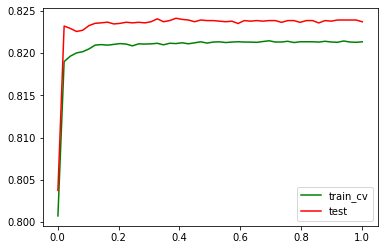

In [ ]:
plot(c_values, logit_train_scores, color='green', label='train_cv')
plot(c_values, logit_test_scores, color='red', label='test')
legend();

Графики почти совпадают, значит модель стабильна